#### Importing libraries. Numpy is used for math and arrays, and matplotlib is used for visualisations.

In [9]:
#Code from machinelearningmastery

#Evolution strategy (mu, lambda) of the ackley objective function

from numpy import asarray
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi
from numpy import argsort
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed

# ackley multimodal function
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D

#### The objective function. Takes in a parameter v. The function returns the result of the Ackley function taking in x and y (from v).

In [10]:
# objective function
def objective(v):
    x, y = v
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x**2 + y**2))) - exp(0.5 * (cos(2 * pi * x) + cos(2 * pi * y))) + e + 20

#### Displaying a visualisation of the Ackley function. This is creating a 3D plot of the results of all x and y values in range -5 to 5.

As x and y approaches 0, the result also approaches 0.

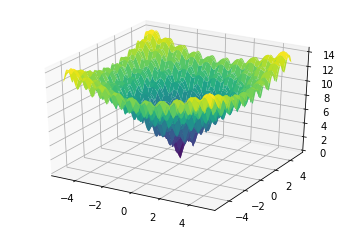

In [11]:
def disp_objective(): 
    # define range for input
    r_min, r_max = -5.0, 5.1
    # sample input range uniformly at 0.1 increments
    xaxis = arange(r_min, r_max, 0.1)
    yaxis = arange(r_min, r_max, 0.1)
    # create a mesh from the axis
    x, y = meshgrid(xaxis, yaxis)
    v = x, y
    #print(x,y)
    # compute targets
    results = objective(v)
    # create a surface plot with the jet color scheme
    figure = pyplot.figure()
    axis = figure.gca(projection='3d')
    axis.plot_surface(x, y, results, cmap='viridis')
    # show the plot
    pyplot.show()
disp_objective()

#### Helper function that returns true or false if a point lies inside the bounds of the dimensions. 

In [12]:
# check if a point is within the bounds of the search
def in_bounds(point, bounds):
    # enumerate all dimensions of the point
    for d in range(len(bounds)):
        # check if out of bounds for this dimension
        if point[d] < bounds[d, 0] or point[d] > bounds[d, 1]:
            return False
    return True

#### Evolutionary strategy function. This uses (mu, lambda)-ES.
Lambda (lam) refers to the size of the population, while mu refers to the number of parents.

The number of children are generated from lambda / mu.

The comma in this algorithm means that the children replace the parents directly on each iteration of the algorithm.





In [13]:
# evolution strategy (mu, lambda) algorithm
def es_comma(objective, bounds, n_iter, step_size, mu, lam):
    best, best_eval = None, 1e+10
    # calculate the number of children per parent
    n_children = int(lam / mu)
    # initial population
    population = list()
    for _ in range(lam):
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
        population.append(candidate)
    
    # perform the search
    for epoch in range(n_iter):
        # evaluate fitness for the population
        scores = [objective(c) for c in population]
        # rank scores in ascending order
        ranks = argsort(argsort(scores))
        # select the indexes for the top mu ranked solutions
        selected = [i for i,_ in enumerate(ranks) if ranks[i] < mu]
        # create children from parents
        children = list()
        for i in selected:
            # check if this parent is the best solution ever seen
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
                print('%d, Best: f(%s) = %.5f' % (epoch, best, best_eval))
            # create children for parent
            for _ in range(n_children):
                child = None
                while child is None or not in_bounds(child, bounds):
                    child = population[i] + randn(len(bounds)) * step_size
                children.append(child)
        # replace population with children
        population = children
    return [best, best_eval]

#### Evolutionary strategy function. This uses (mu + lambda)-ES.

The plus indicates that both parents and children are added to the population.

In [14]:
# evolution strategy (mu + lambda) algorithm
def es_plus(objective, bounds, n_iter, step_size, mu, lam):
    best, best_eval = None, 1e+10
    # calculate the number of children per parent
    n_children = int(lam / mu)
    # initial population
    population = list()
    for _ in range(lam):
        candidate = None
        while candidate is None or not in_bounds(candidate, bounds):
            candidate = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
        population.append(candidate)

    # perform the search
    for epoch in range(n_iter):
        # evaluate fitness for the population
        scores = [objective(c) for c in population]
        # rank scores in ascending order
        ranks = argsort(argsort(scores))
        # select the indexes for the top mu ranked solutions
        selected = [i for i,_ in enumerate(ranks) if ranks[i] < mu]
        # create children from parents
        children = list()
        for i in selected:
            # check if this parent is the best solution ever seen
            if scores[i] < best_eval:
                best, best_eval = population[i], scores[i]
                print('%d, Best: f(%s) = %.5f' % (epoch, best, best_eval))
            # keep the parent
            children.append(population[i])
            # create children for parent
            for _ in range(n_children):
                child = None
                while child is None or not in_bounds(child, bounds):
                    child = population[i] + randn(len(bounds)) * step_size
                children.append(child)
        # replace population with children
        population = children
    return [best, best_eval]

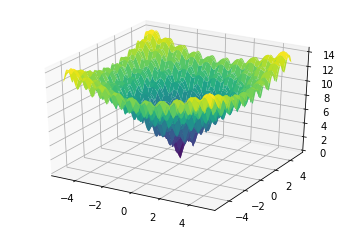

0, Best: f([1.02763376 0.44883183]) = 4.63303
0, Best: f([ 0.21848322 -0.8533806 ]) = 3.56791
1, Best: f([ 0.11429804 -0.87582578]) = 2.98776
1, Best: f([-0.08102496  0.82601141]) = 2.98603
2, Best: f([-0.0993111  -0.94982376]) = 2.83134
2, Best: f([ 0.01868248 -0.93541655]) = 2.59582
3, Best: f([ 0.00545747 -0.94925813]) = 2.58095
9, Best: f([-0.00111676 -0.95592003]) = 2.58030
36, Best: f([-0.00183484 -0.94981432]) = 2.58015
60, Best: f([ 0.00176496 -0.95237758]) = 2.58001
102, Best: f([-0.13423234 -0.22926793]) = 1.96781
102, Best: f([-0.2065585  -0.16088463]) = 1.95293
102, Best: f([ 0.01320799 -0.22532683]) = 1.56863
103, Best: f([-0.07782502  0.03925709]) = 0.43824
103, Best: f([0.00066054 0.07841254]) = 0.37751
103, Best: f([-0.05926953  0.02294873]) = 0.28414
104, Best: f([0.04116476 0.02082416]) = 0.18629
105, Best: f([0.02189198 0.02151476]) = 0.11175
105, Best: f([-0.02624743 -0.00416291]) = 0.09387
106, Best: f([-0.00634358 -0.01086916]) = 0.03981
108, Best: f([-0.0075026 -

In [15]:
# seed the pseudorandom number generator
seed(0)

# define range for input
bounds = asarray([[-5.0, 5.0], [-5.0, 5.0]])

# display the function
disp_objective()

# define the total iterations
n_iter = 5000
# define the maximum step size
step_size = 0.15
# number of parents selected
mu = 8
# the number of children generated by parents
lam = 64
# perform the evolution strategy (mu, lambda) search
best, score = es_comma(objective, bounds, n_iter, step_size, mu, lam)
print('\n--------------- ES-Comma outcome ------------------\n')
print('f(%s) = %f' % (best, score))


print('\n=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=/=\n')

best, score = es_plus(objective, bounds, n_iter, step_size, mu, lam)
print('\n--------------- ES-Plus outcome ------------------\n')
print('f(%s) = %f' % (best, score))

